In [1]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Part 1: Questions 1 to 3

First, we read in the data and look at the first 5 rows.

In [2]:
file1 = r'D:\Programing\python_projects\machine_learning_algorithm\data_set\voltage_current_data.csv'
df_vc = pd.read_csv(file1)
df_vc.head(5)

,voltage,current,type
0,26.040247,68.654996,Silicon
1,16.202469,45.383931,Silicon
2,18.105575,45.662902,Silicon
3,18.499687,49.730946,Silicon
4,23.625672,64.926232,Silicon


Your goals:

1a: Using scikit-learn, create a linear model that uses 1 feature to predict current from voltage. You should not set fit_intercept=False when training your model, that is, your model should have a non-zero y-intercept.

1b: Compute the mean squared error for your model from part 1a.

1c: Using seaborn (a.k.a. sns), create a plot showing a linear regression where you predict current from voltage.

2a: Create a linear model that uses the voltage and the material type to predict current. This model should have 4 features (voltage, carbon, silicon, and germanium). As before, you should not set fit_intercept=False when training your model.

2b: Compute the mean squared error for your model from part 2a.

2c: Using seaborn, create 3 linear regression plots, one for each of the 3 materials. You can do this all on one axis using hue="material", or you can do it on 3 separate axes by looking at the seaborn tutorial.

3: Super hard bonus task: Try to create a model that does better than your model in 2b. Hint: Use your plot from part 2c for inspiration. As before, you should not set fit_intercept=False when training your model. Don't be sad if you get stuck, we will cover the solution to this problem in detail in the next lecture.

In [3]:
lrm = linear_model.LinearRegression()
lrm.fit(df_vc[['voltage']], df_vc['current'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
lrm.intercept_

5.349683736503806

In [5]:
lrm.coef_

array([3.75687657])

In [6]:
mse = mean_squared_error(lrm.predict(df_vc[['voltage']]), df_vc['current'])
mse

522.8580481139716

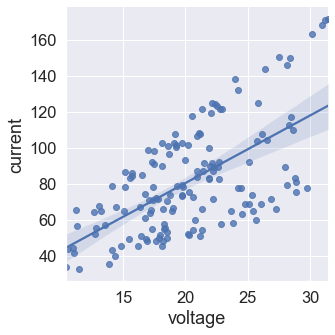

In [7]:
sns.lmplot(x='voltage', y='current', data=df_vc)

In [8]:
df2 = pd.DataFrame(df_vc[['voltage', 'type']])

In [9]:
df2

,voltage,type
0,26.040247,Silicon
1,16.202469,Silicon
2,18.105575,Silicon
3,18.499687,Silicon
4,23.625672,Silicon
...,...,...
145,15.716044,Germanium
146,15.122615,Germanium
147,13.102318,Germanium
148,14.099747,Germanium


In [10]:
dummies = pd.get_dummies(df2['type'])
dummies.head()

,Carbon,Germanium,Silicon
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [11]:
df_dummies = pd.concat([df2, dummies], axis=1)
df_dummies = df_dummies.drop(['type'], axis=1)

In [12]:
lrm_type = linear_model.LinearRegression()
lrm_type.fit(df_dummies, df_vc['current'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
mse2 = mean_squared_error(lrm_type.predict(df_dummies), df_vc['current'])
mse2

62.542793422591046

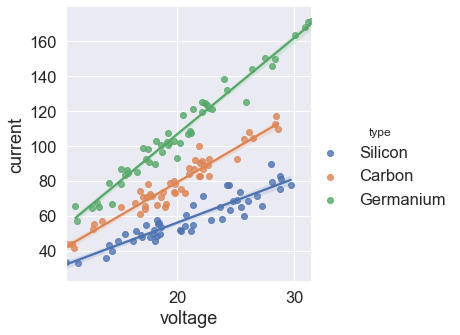

In [14]:
sns.lmplot(data=df_vc, x='voltage', y='current', hue='type')

Our model in 2a has an output that is equal to theta_1*voltage + theta_2 (if silicon) + theta_3 (if carbon) + theta_4 (if germanium)
That is, each type has a fixed positive offset.
From our plot in 2b shows that this is not a good model. Instead, a better model would be:
current = theta_1 * voltage (if silicon) + theta_2 * voltage (if carbon) + theta_3 * voltage (if germanium)
To do this, we can replace the dummy value of 1 by the voltage and remove the 
voltage column.

In [15]:
df_scaled = pd.DataFrame(df_dummies)
df_scaled['Carbon'] = df_scaled['Carbon'] * df_scaled['voltage']
df_scaled['Germanium'] = df_scaled['Germanium'] * df_scaled['voltage']
df_scaled['Silicon'] = df_scaled['Silicon'] * df_scaled['voltage']
df_scaled = df_scaled.drop(['voltage'], axis=1)
df_scaled.head()

,Carbon,Germanium,Silicon
0,0.0,0.0,26.040247
1,0.0,0.0,16.202469
2,0.0,0.0,18.105575
3,0.0,0.0,18.499687
4,0.0,0.0,23.625672


In [16]:
lrm_scaled = linear_model.LinearRegression()
lrm_scaled.fit(df_scaled, df_vc['current'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lrm_scaled.coef_

array([3.9045347 , 5.29989642, 2.72432338])

In [18]:
lrm_scaled.intercept_

1.2044777216614193

In [19]:
mse3 = mean_squared_error(lrm_scaled.predict(df_scaled), df_vc['current'])
mse3

25.71421402308475

# Part 2 : Questions 4 and 5

For this second part of the homework, we'll use a dataset which relates the size and price of items that were for sale.

In [21]:
file2 = r'D:\Programing\python_projects\machine_learning_algorithm\data_set\size_price_data.csv'
df_size_and_price = pd.read_csv(file2)
df_size_and_price.head(5)

,size,price
0,28.160139,1000.000000
1,30.610467,308.864354
2,18.067518,183.293245
3,16.394573,160.358017
4,21.429342,215.977579


**For this part, you should complete each task using scikit-learn, not seaborn (sns).** You are welcome to use seaborn to explore the data, but we recommend completing all the tasks below using only scikit-learn code.

Your goals:

4a: Create a linear regression model that uses the size to predict the price.

4b: Create a plot which shows the original data (as a scatter plot). On top of this scatter plot, overlay your linear regression model's predictions of price vs. value. You should see that the slope predicted by the model is way off from the correct slope due to the outlier point.

4c: Compute the MAE (L1 loss) and MSE (L2 loss) for your linear model.

5a: Now create a linear regression model that minimizes the L1 loss instead of the L2 loss. Create a HuberRegressor model with epsilon = 1 that uses size to predict the price.

5b: Repeat task 4b, but now overlay the predictions of the HuberRegressor. You should see that the outlier point is no longer causing us any problems.

5c: Compute the MAE (L1 loss) and MSE (L2 loss) for your new model and compare with your answer to 4c.

In [22]:
lrm_sp = linear_model.LinearRegression()
lrm_sp.fit(df_size_and_price[['size']], df_size_and_price['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
mae1 = mean_absolute_error(lrm_sp.predict(df_size_and_price[['size']]),
                           df_size_and_price['price'])
mae1

35.052812109569416

In [24]:
mse1 = mean_squared_error(lrm_sp.predict(df_size_and_price[['size']]),
                          df_size_and_price['price'])
mse1

9404.44256045564

Text(0, 0.5, 'price')

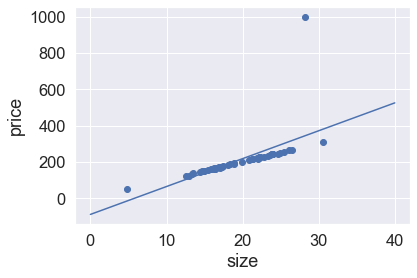

In [26]:
plt.scatter(df_size_and_price['size'], df_size_and_price['price'])
sizes = np.linspace(0, 40, 100).reshape(-1, 1)
predictions = lrm_sp.predict(sizes)
plt.plot(sizes, predictions)
plt.xlabel('size')
plt.ylabel('price')

In [27]:
hub_sp = linear_model.HuberRegressor(epsilon=1)
hub_sp.fit(df_size_and_price[['size']], df_size_and_price['price'])

HuberRegressor(alpha=0.0001, epsilon=1, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

Text(0, 0.5, 'price')

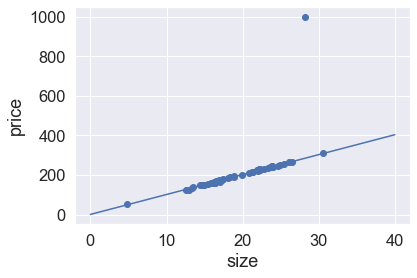

In [28]:
plt.scatter(df_size_and_price['size'], df_size_and_price['price'])
sizes = np.linspace(0, 40, 100).reshape(-1, 1)
predictions = hub_sp.predict(sizes)
plt.plot(sizes, predictions)
plt.xlabel('size')
plt.ylabel('price')

In [30]:
mse2 = mean_squared_error(hub_sp.predict(df_size_and_price[['size']]),
                          df_size_and_price['price'])
mse2

10255.223839666982

In [31]:
#Compared to our answer in 4c, the MSE is actually worse. This is because our HuberRegressor optimizes the MAE, not the MSE.
mae2 = mean_absolute_error(hub_sp.predict(df_size_and_price[['size']]),
                           df_size_and_price['price'])
mae2

16.401784174952567

In [32]:
hub_sp.coef_

array([10.07300749])

In [33]:
hub_sp.intercept_

0.5238989589457136

In [34]:
#extra
# If we pick a large epsilon, we'll get approximately the same model results as we did in part 4b
f_sp_hub_large_epsilon = linear_model.HuberRegressor(epsilon=1000)
f_sp_hub_large_epsilon.fit(df_size_and_price[['size']],
                           df_size_and_price['price'])
f_sp_hub_large_epsilon.coef_

array([15.36310176])